#**Fashion MNIST classification**

Fashion-MNIST is a dataset consist of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

Each row is a separate image.
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)

First we need to import necessary libraries

In [1]:
# TensorFlow is a free and open-source software library for machine learning.
# It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.

import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

It is so simple to alter default hardware (CPU to GPU or vice versa); just follow Runtime>Change runtime type and select GPU as Hardware accelerator

In [3]:
# To check the allocated GPU specs in Google Colab, you can use the ! nvidia-smi command.

!nvidia-smi

Fri Oct 27 17:45:59 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.84                 Driver Version: 545.84       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1060 6GB  WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   53C    P0              31W / 140W |   2047MiB /  6144MiB |      4%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## **1. Fashion MNIST dataset**

In [4]:
# Keras is an open-source library that provides a Python interface for artificial neural networks.
# Keras acts as an interface for the TensorFlow library.
# You can load some of the datasets including fashion-mnist using Keras.

mnist = tf.keras.datasets.fashion_mnist

# Split the data into train and test
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalizing the data by scaling pixels in the range 0-1 (divide values by 255 since pixel values are between 0 and 255)
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

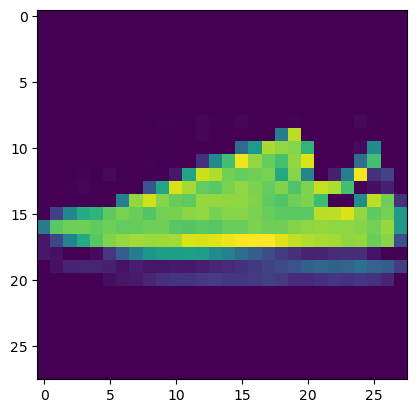

In [5]:
plt.imshow(train_images[6])

The training set is made up of 28x28 grayscale images of fashion items.

Let's visualize some of these images and their corresponding training labels.

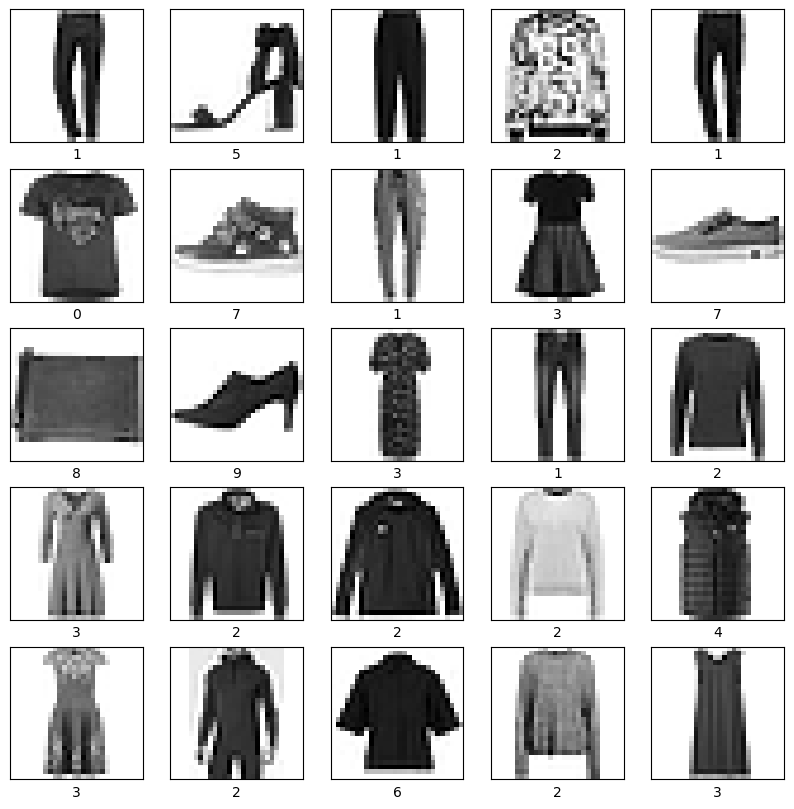

In [6]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,25)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

## **2. Fully Connected Neural Network for clothing items classification**

You can start by building a simple neural network with two fully connected layers and use it for fashion items classification. Our network will ultimately output a probability distribution over the 10 item classes (0-9). The architecture is as follows: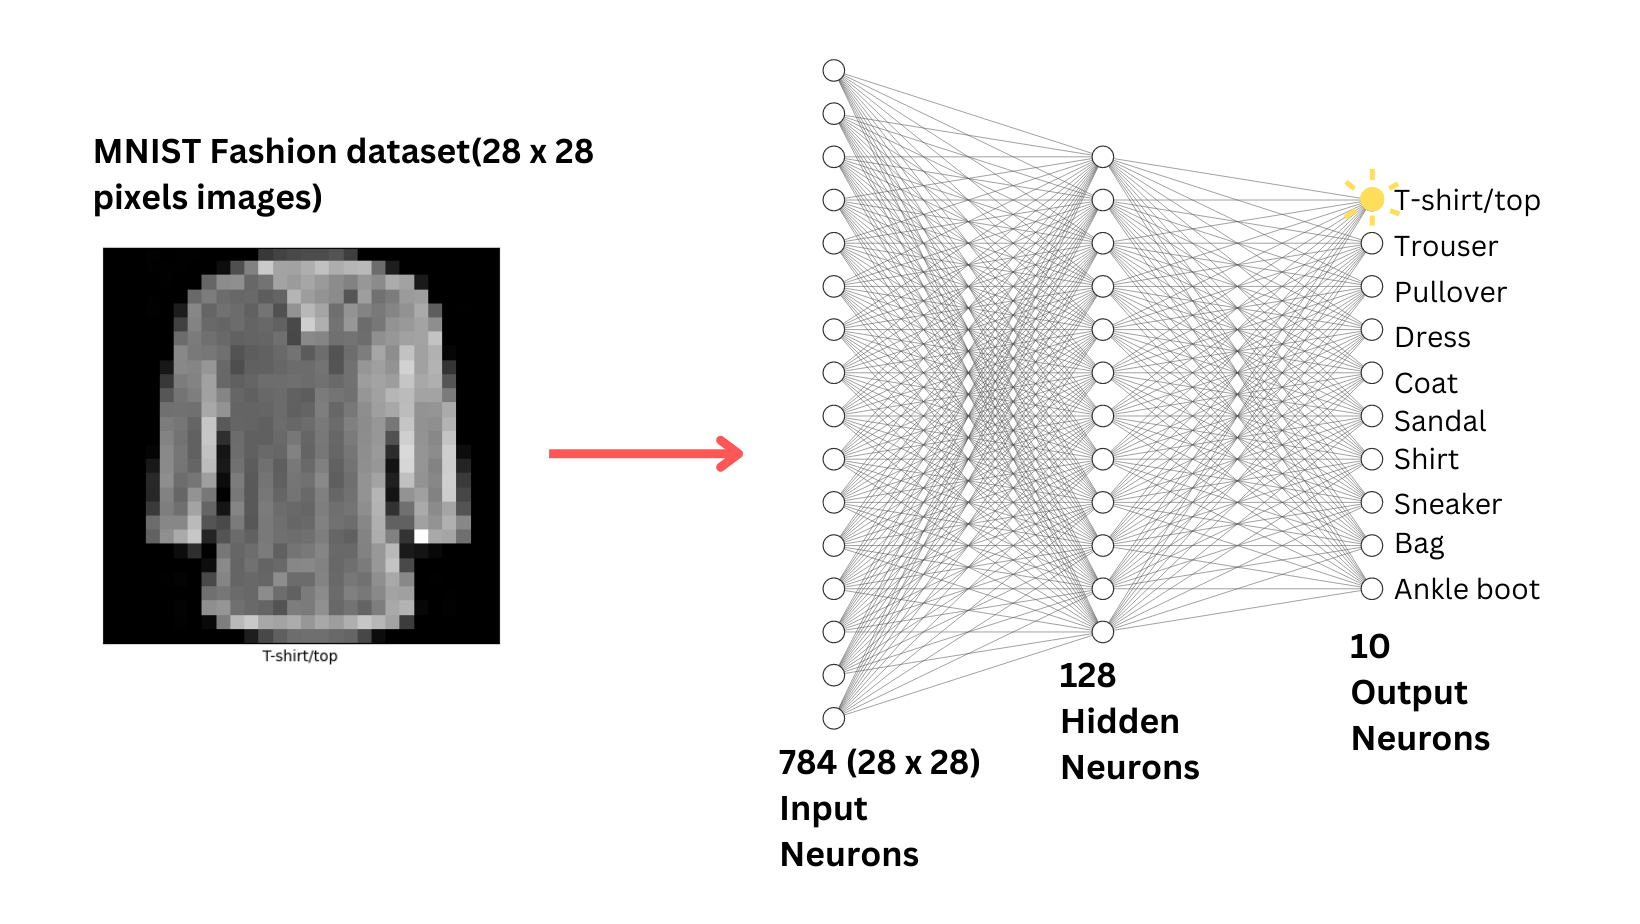

### **Build the model**

In [7]:
def build_fc_model():
  # Model is defined using sequential class from Keras
  fc_model = tf.keras.Sequential([
      # First define a Flatten layer, we need this to prepare the input in a flattened form (rather than having 28x28 pixels, we have 784 pixels)
      tf.keras.layers.Flatten(input_shape=(28, 28)),

      # '''TOCOMPLETE: Pick the activation function for the first fully connected (Dense) layer.'''
      tf.keras.layers.Dense(128, activation="relu"),

      # '''TOCOMPLETE: Define the second Dense layer to output the classification probabilities'''
      tf.keras.layers.Dense(10, activation='softmax')

  ])
  return fc_model

model = build_fc_model()

Note that in order to update the model later on, you'll need to re-run the above cell to re-initialize the model. So each time you change any detail in the network or hyperparameters you need to re-run the cell so that you do not use the already trained model.

More detail about the architecture:

tf.keras.layers.Flatten, converts the images of 2d-array (28 x 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. No parameters (weights) are learned in this layer; the data is only reformated.

Then we have two dense layers which are fully connected layers. The first one have 128 neurons and the last one is an array of probability scores which sum up to 1. Each neuron in the last layer contains a score that shows the probability that the current image belongs to one of the fashion item classes.


### **Compile the model**

This step has to be before training the model. We need to take care of:

Loss function — This defines how we measure how accurate or precise the model is while training. During training we want to minimize this function.

Optimizer — This defines how the model is updated based on the data it sees and its loss function.

Metrics — Here we can define metrics used to monitor the training and testing steps. In this example, we'll look at the accuracy, the fraction of the images that are correctly classified.

We start by using a stochastic gradient descent (SGD) optimizer initialized with a learning rate of 0.1. Since we are performing a categorical classification task, we want to use the [cross entropy loss](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/sparse_categorical_crossentropy).

You will try different optimizers and learning rate values to find the effect of each on the accuracy of the trained model.

In [8]:
# '''TOCOMPLETE: Try different optimizers and learning rates. How do these affect
#    the accuracy of the trained model? Which optimizers and/or learning rates gives the best performance?'''
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### **Train the model**

Now we can train our model. For this aim, we feed the training data (train_images and train_labels) into the model, and then asking it to learn the weights (associations between images and labels). We'll also need to define the batch size and the number of epochs, or iterations over the dataset, to use during training.

Running the cell bellow, the model is trained and the loss and accuracy metrics are displayed.

In [9]:
# Pick the batch size and the number of epochs to use during training
BATCH_SIZE = 64
EPOCHS = 32

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/32
938/938 [==============================] - 2s 1ms/step - loss: 0.5874 - accuracy: 0.7925
Epoch 2/32
938/938 [==============================] - 1s 1ms/step - loss: 0.4245 - accuracy: 0.8481
Epoch 3/32
938/938 [==============================] - 1s 1ms/step - loss: 0.3841 - accuracy: 0.8626
Epoch 4/32
938/938 [==============================] - 1s 1ms/step - loss: 0.3590 - accuracy: 0.8706
Epoch 5/32
938/938 [==============================] - 2s 2ms/step - loss: 0.3404 - accuracy: 0.8774
Epoch 6/32
938/938 [==============================] - 2s 2ms/step - loss: 0.3259 - accuracy: 0.8808
Epoch 7/32
938/938 [==============================] - 1s 1ms/step - loss: 0.3130 - accuracy: 0.8864
Epoch 8/32
938/938 [==============================] - 2s 2ms/step - loss: 0.3037 - accuracy: 0.8885
Epoch 9/32
938/938 [==============================] - 1s 1ms/step - loss: 0.2937 - accuracy: 0.8917
Epoch 10/32
938/938 [==============================] - 2s 2ms/step - loss: 0.2847 - accuracy: 0.8967

### **Evaluate accuracy on the testset**

Now that we've trained the model, we can ask it to predict for the testset that it hasn't seen before. In this example, the test_images array comprises our test dataset. To evaluate accuracy, we can check to see if the model's predictions match the labels from the test_labels array.

In [10]:
# '''TOCOMPLETE: The evaluate method is used to test the model!'''
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 855us/step - loss: 0.3657 - accuracy: 0.8736
Test accuracy: 0.8736000061035156


You may observe that the accuracy on the test dataset is a little lower than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of overfitting, when a machine learning model performs worse on new data than on its training data.

What is the highest accuracy you can achieve with this fully connected model? Can we improve the accuracy with another type of architecture?

## **3. Convolutional Neural Network for clothing items classification**

Convolutional neural networks (CNNs) are particularly suitable for a variety computer vision tasks. We will now build a CNN composed of two convolutional layers and pooling layers, followed by two fully connected layers, and ultimately output a probability distribution over the 10 fashion item classes (0-9). The CNN is as follows:

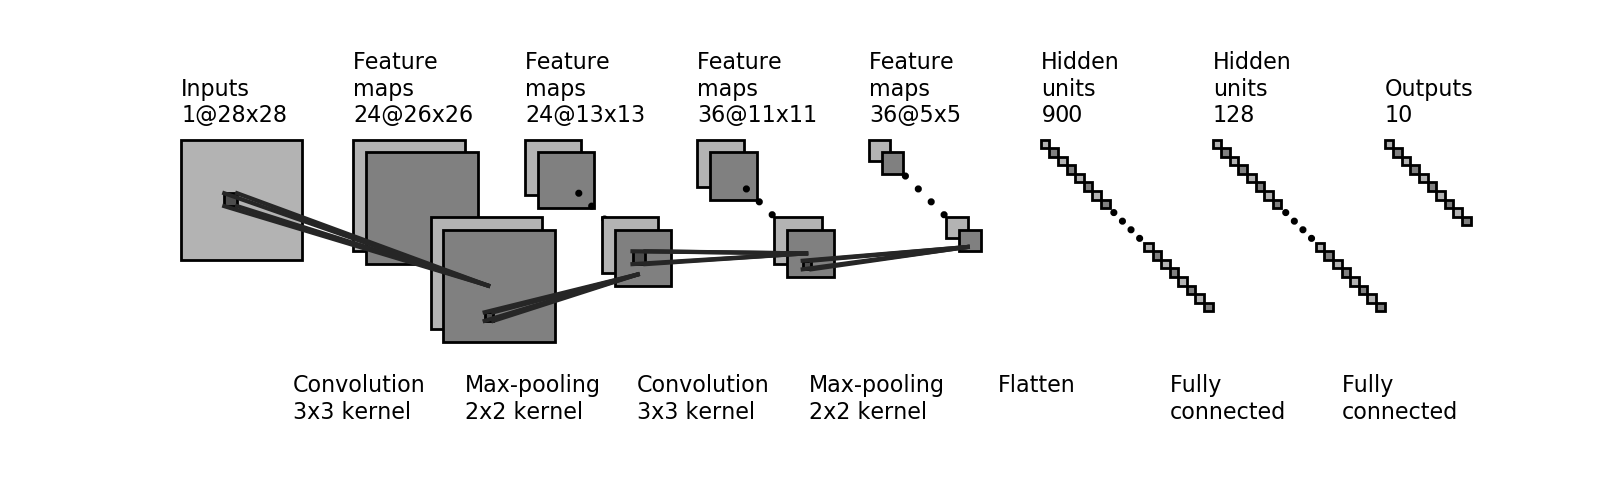

In [11]:
num_classes = 10

In [12]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        # TOCOMPLETE: Define the first convolutional layer
        tf.keras.layers.Conv2D(activation='relu', kernel_size=(3, 3), filters=(50)),

        # TOCOMPLETE: Define the first max pooling layer
        tf.keras.layers.MaxPool2D((2,2)),

        # TOCOMPLETE: Define the second convolutional layer
        tf.keras.layers.Conv2D(activation='relu', kernel_size=(3, 3), filters=(50)),

        # TOCOMPLETE: Define the second max pooling layer
        tf.keras.layers.MaxPool2D((2,2)),

        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation='relu'),




        # TOCOMPLETE: Define the last Dense layer to output the classification probabilities.
        # Pay attention to the activation needed a probability output.
        tf.keras.layers.Dense(num_classes, activation='relu')
    ])

    return cnn_model

cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

1/1 [==============================] - 0s 137ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 50)        500       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 50)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 50)        22550     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 50)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1250)              0         
                                                                 
 

### **Compile, train, and evaluate**

In [13]:
# '''TOCOMPLETE: The compile operation needs an optimizer and learning rate of choice'''
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# '''TOCOMPLETE: Use model.fit to train the CNN model, with the same batch_size and number of epochs previously used.'''
cnn_model.fit(train_images, train_labels, batch_size=64, epochs=32)

Epoch 1/32
938/938 [==============================] - 18s 19ms/step - loss: 2.5453 - accuracy: 0.1090
Epoch 2/32
938/938 [==============================] - 18s 19ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 3/32
938/938 [==============================] - 19s 20ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 4/32
938/938 [==============================] - 18s 19ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 5/32
938/938 [==============================] - 18s 20ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 6/32
938/938 [==============================] - 19s 20ms/step - loss: 2.3023 - accuracy: 0.1002
Epoch 7/32
938/938 [==============================] - 19s 20ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 8/32
938/938 [==============================] - 19s 20ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 9/32
938/938 [==============================] - 19s 20ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 10/32
938/938 [==============================] - 19s 20ms/step - loss: 2.302

In [15]:
# '''TOCOMPLETE: The evaluate method is used to test the model!'''
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1000
Test accuracy: 0.10000000149011612


What is the highest accuracy you're able to achieve using the CNN model, and how does the accuracy of the CNN model compare to the accuracy of the simple fully connected network? What optimizers and learning rates seem to be optimal for training the CNN model?

**The answer to the question above**

The highest test accuracy I was able to achieve using the CNN model was the accuracy of 0.1. The simply fully connected network had a much better accuracy at 0.88.
For CNN the SGD optimizer worked well with a learning rate of 0.1 with such a good accuracy of 0.88.

### **Make predictions with the CNN model**

we can use trained model to predict the label for some test images. The predict function outputs predictions given a set of input samples.

In [16]:
predictions = cnn_model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


with the line above, model has predicted the label for each image in the testset. Let's take a look at the prediction for the third image in the testset:

In [17]:
predictions[3]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

As you can see, a prediction is an array of 10 numbers. Note that the output of our model is a probability distribution over the 10 item classes. Thus, these numbers describe the model's "confidence" that the image corresponds to each of the 10 different items.

Let's look at the item that has the highest confidence for the third image in the testset:

In [19]:
# '''TOCOMPLETE: Find the item with the highest confidence prediction for the third image in the testset.'''
prediction = np.argmax(predictions[2])
print(prediction)

0


So the model is most confident that this image is a "?". We can check the true label to see if this prediction is correct:

The true label for this item is: 1


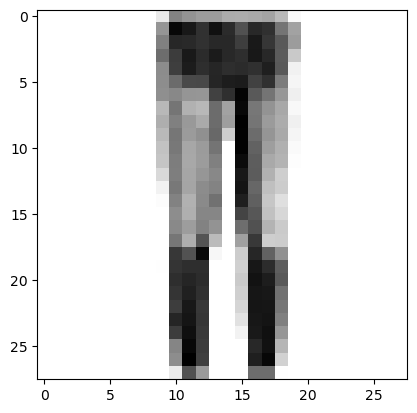

In [20]:
print("The true label for this item is:", test_labels[3])
plt.imshow(test_images[3,:,:,0], cmap=plt.cm.binary)